In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#데이터 분석과 조작을 위한 라이브러리
import pandas as pd

#CSV 불러오기
df = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv") #경로 입력

#출력
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

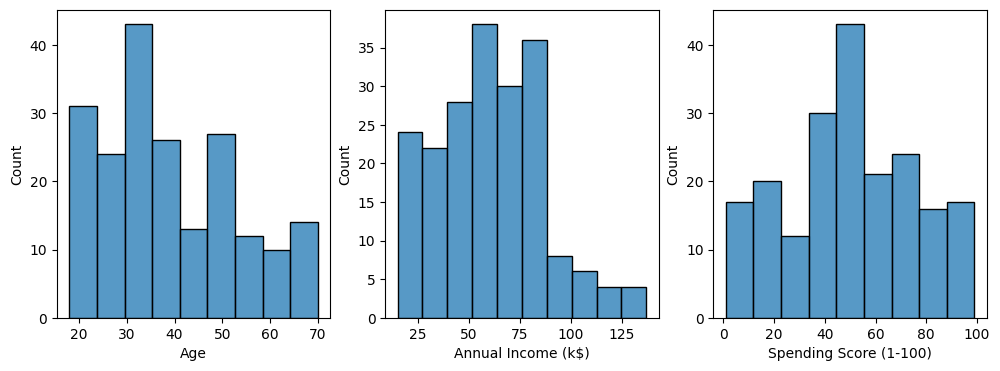

In [ ]:
# 데이터와 그래프 시각화를 위한 라이브러리
import seaborn as sns
from matplotlib import pyplot as plt

# 그래프의 크기를 설정(가로, 세로)
fig = plt.figure(figsize=(12, 4))

# 서브플롯을 생성
#서브플롯은 하나의 그림안에 여러 개의 작은 그래프를 배치하는 기능
# 1행 3열로 그래프를 나누고, 첫 번째 서브플롯을 ax1에 할당
ax1 = fig.add_subplot(1, 3, 1)
# 두 번째 서브플롯을 ax2에 할당
ax2 = fig.add_subplot(1, 3, 2)
# 세 번째 서브플롯을 ax3에 할당
ax3 = fig.add_subplot(1, 3, 3)

# 첫 번째 서브플롯에 연령(Age) 열의 히스토그램 시각화
sns.histplot(df["Age"], ax=ax1)
# 두 번째 서브플롯에 연간 수익(Annual Income) 열의 히스토그램 시각화
sns.histplot(df["Annual Income (k$)"], ax=ax2)
# 세 번째 서브플롯에 지출 점수(Spending Score (1-100)) 열의 히스토그램 시각화
sns.histplot(df["Spending Score (1-100)"], ax=ax3)



In [ ]:
# K-Means 알고리즘 가져오기
from sklearn.cluster import KMeans

# 모델을 학습시키는 함수 정의(클러스터 수, 데이터)
def train_model(num_cluster, data):
    # KMeans 모델을 생성(클러스터 수, 초기 중심값 설정 반복 횟수, 난수 발생기의 초기값)
    model = KMeans(
        n_clusters=num_cluster,
        n_init=10,
        random_state=1234
    )

    # 모델을 데이터에 맞춰 학습
    model.fit(data)

    # 학습된 모델 반환
    return model


In [ ]:
 # 반복 작업 진행 상황(progress bar)을 시각적으로 보여주는 라이브러리
from tqdm.notebook import tqdm

# 적절한 클러스터 개수를 찾는 함수
def elbow_method(data):

    # 각 클러스터 개수에 따른 inertia을 저장할 리스트를 초기화
    # inertia: 각 데이터 포인트와 해당 클러스터 중심 간 거리의 제곱합
    inertia_list = []

    # 클러스터 개수를 2에서 10까지 변경하며 KMeans 모델 학습
    for i in tqdm(range(2, 11)):

        # 모델 학습
        model = train_model(i, data)

        # 학습된 모델의 inertia을 리스트에 추가
        inertia_list.append(model.inertia_)

    # 각 클러스터 개수에 대한 inertia 리스트를 반환
    return inertia_list


In [ ]:
# 클러스터 수에 따른 Inertia을 시각화하는 함수(클러스터 개수에 따른 inertia 값, 시각화 대상의 열 이름)
def plot_inertia(inertia_list, target_columns):

    # 클러스터 개수(2~10)와 대응하는 관성값을 선 그래프로 시각화
    plt.plot(range(2, 11), inertia_list, marker="o", label="inertia")

    # 그래프 제목 설정(열이름 '_'로 연결)
    plt.title(f"{'_'.join(target_columns)} KMeans clustering Inertia")

    # x축
    plt.xlabel("num clusters")

    # y축
    plt.ylabel("inertia")


  0%|          | 0/9 [00:00<?, ?it/s]

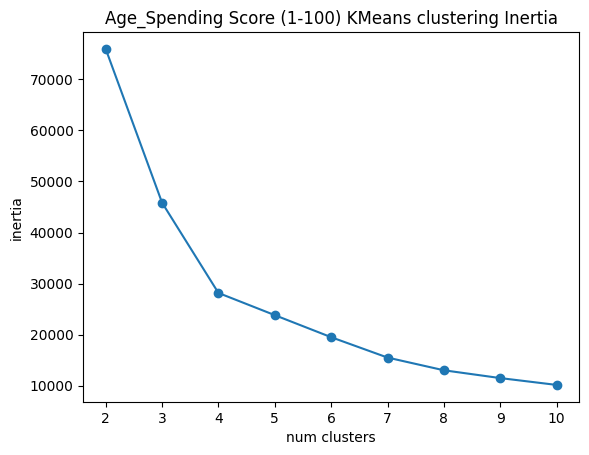

In [ ]:
#연령, 소비지수 클러스터링 K값 찾기

# 사용할 데이터 열 지정
target_columns = ["Age", "Spending Score (1-100)"]

# df에서 지정한 열만 선택
data = df[target_columns]

# inertia 리스트 계산
inertia_list = elbow_method(data)

# 시각화
plot_inertia(inertia_list, target_columns)

# 그래프 표시
plt.show()


In [ ]:
#수치계산과 시각화 라이브러리
import numpy as np
import matplotlib.pyplot as plt

# KMeans 모델 훈련
K = 4
model = train_model(num_cluster=K, data=data)

# 새로운 데이터에 대한 예측을 수행하는 함수
def inference(model, data):

    # 그리드 해상도(간격)
    h = 0.02

    # 데이터의 최소, 최대값을 구하여, 그리드 범위 설정
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

    # 그리드 좌표 생성 (X, Y 값)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # 그리드의 각 점에 대해 클러스터 예측
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])  # 예측 결과

    # 예측 결과를 2D 형태로 변환
    return xx, yy, Z


In [ ]:
#k-means 결과 시각화 함수
def plot_kmeans_cluster(xx, yy, Z, model, data, columns):

    # KMeans 모델에서 군집 레이블을 가져오기
    labels = model.labels_
    # KMeans 모델에서 각 클러스터의 중심 좌표를 가져오기
    centroids = model.cluster_centers_

    # 그래프 크기 설정
    plt.figure(1, figsize=(10, 5))
    #기존 플롯 지우기
    plt.clf()

    # 예측된 결과 Z를 xx.shape에 맞게 reshape
    Z = Z.reshape(xx.shape)

    # 군집 결과를 그리드에 시각화
    plt.imshow(
        Z,  # 그리드에 대한 예측 결과 (각 셀에 대해 예측된 군집 번호)
        interpolation='nearest',  # 인접한 픽셀을 가장 가까운 값으로 채우기
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),  # 그리드의 범위 설정
        cmap=plt.cm.Pastel2,  # 컬러맵을 Pastel2로 설정
        aspect='auto',  # 종횡비(가로,세로 비율)를 자동으로 설정
        origin='lower'  # 원점이 그리드의 왼쪽 하단에 위치하도록 설정
    )

    # 원본 데이터 포인트들을 군집에 맞는 색으로 표시
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=10)

    # 클러스터 중심을 강조(X좌표, Y좌표, 점크기, 색, 투명도)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', alpha=0.5)

    # x축과 y축 라벨을 설정
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


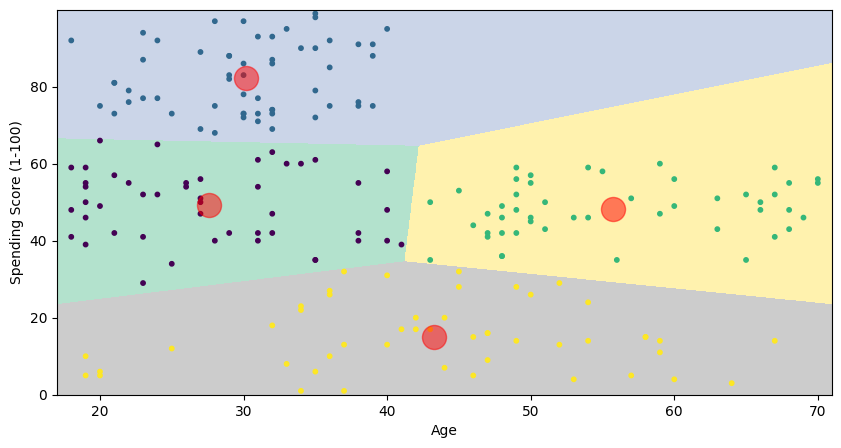

In [ ]:
import numpy as np

#k-means 예측 함수 불어오기
xx, yy, Z = inference(model, data.values)

#결과 시각화 함수 불러오기
plot_kmeans_cluster(xx, yy, Z, model, data.values, target_columns)

  0%|          | 0/9 [00:00<?, ?it/s]

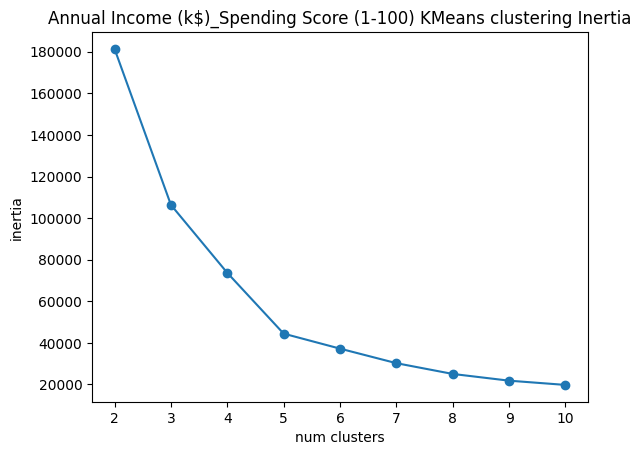

In [ ]:
target_columns = ["Annual Income (k$)", "Spending Score (1-100)"]
data = df[target_columns]
inertia_list = elbow_method(data)
plot_inertia(inertia_list, target_columns)

In [ ]:
K = 5
model = train_model(num_cluster = K, data=data)

def inference(model, data):
    h = 0.02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    return xx, yy, Z

In [ ]:
def plot_kmeans_cluster(xx, yy, Z, model, data, columns):
    labels = model.labels_
    centroids = model.cluster_centers_
    plt.figure(1 , figsize = (10, 5))
    plt.clf()
    Z = Z.reshape(xx.shape)
    plt.imshow(
        Z,
        interpolation='nearest',
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Pastel2,
        aspect = 'auto',
        origin='lower'
    )
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=10)
    plt.scatter(centroids[: , 0], centroids[: , 1], s=300, c='red', alpha = 0.5)
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


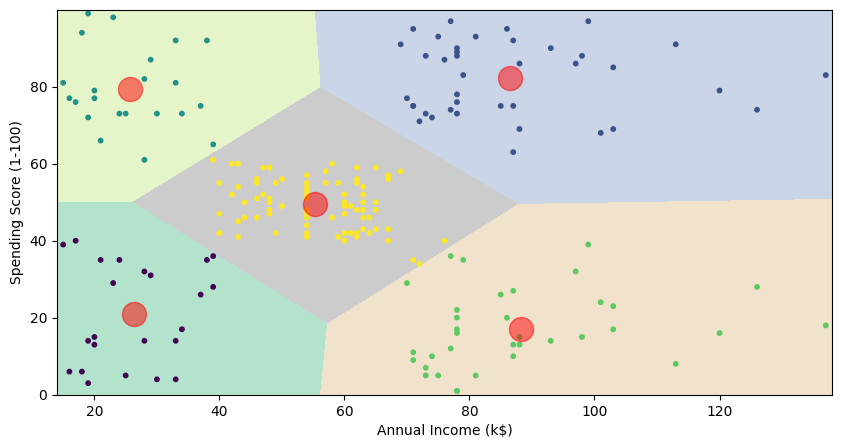

In [ ]:
import numpy as np

xx, yy, Z = inference(model, data.values)

plot_kmeans_cluster(xx, yy, Z, model, data.values, target_columns)

  0%|          | 0/9 [00:00<?, ?it/s]

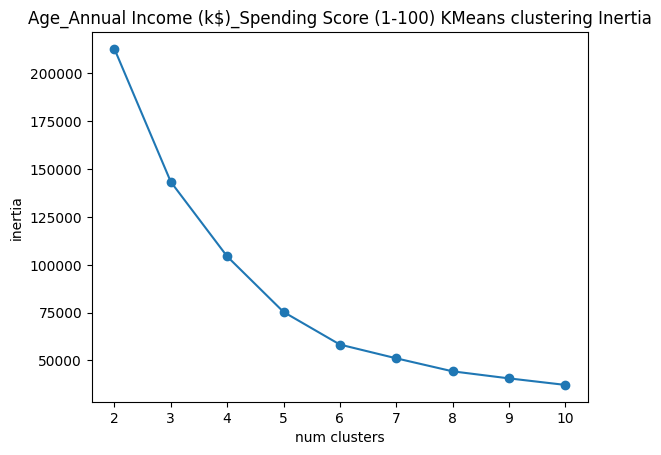

In [ ]:
target_columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
data = df[target_columns]
inertia_list = elbow_method(data)
plot_inertia(inertia_list, target_columns)


In [ ]:
#인터랙티브한 그래프를 만들 수 있는 라이브러리 설치
!pip install plotly

In [ ]:
K = 6
model = train_model(K, data)
labels = model.labels_
centroids = model.cluster_centers_

In [ ]:
# 인터랙티브한 그래프를 만들 수 있는 라이브러리
import plotly.graph_objects as go
import plotly

# 데이터에서 값을 추출하여 numpy 배열로 변환
data_ar = data.values

# 3D 산점도 생성
trace = go.Scatter3d(
    x= data_ar[:, 0],  # x축: 나이(Age) 데이터
    y= data_ar[:, 1],  # y축: 지출 점수(Spending Score) 데이터
    z= data_ar[:, 2],  # z축: 연간 수입(Income) 데이터
    mode='markers',  # 데이터 포인트를 마커로 표시

    # 마커의 속성 설정
    marker={
        "color": labels,  # 클러스터 레이블에 따라 색상 다르게 지정
        "size": 3,  # 마커 크기 설정
        "opacity": 1  # 마커의 불투명도 설정 (1은 불투명)
    }
)

# 그래프 레이아웃 설정
layout = go.Layout(
    title= 'Age-Spending-Income Clustering',  # 그래프의 제목 설정
    scene={  # 3D 그래프의 축 제목 설정
        "xaxis": {"title": "Age"},  # x축 제목: Age
        "yaxis": {"title": "Spending"},  # y축 제목: Spending
        "zaxis": {"title": "Income"},  # z축 제목: Income
    },
    width=1000,  # 그래프의 너비 설정
    height=600  # 그래프의 높이 설정
)

# Figure 객체 생성 (데이터, 그래프 레이아웃)
fig = go.Figure(data=[trace], layout=layout)

# 3D 그래프 출력
plotly.offline.iplot(fig)
